# Temperature Forecast Project using ML

### Problem Statement:

### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:


For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [3]:
# Importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import power_transform
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [5]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Upon review, found target variable Price has continous data so need to approach this dataset as Regression Problem

In [6]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns in the given dataset

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Most of the column datatypes are float data type except Date which is object data type.

### Checking for Null values and Resolving

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Most of the columns has null values since most of the columns are continous, i am using mean to fill the null values

In [9]:
df['station']=df['station'].fillna(df['station'].mean())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [10]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Resolving Null Values under Date Column

In [11]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [12]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Encoding using LabelEncoder.

In [14]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [15]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [16]:
df.describe()      

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,735608.827012,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,11829.341785,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,735807.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736199.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


### Analyzing the relationship between independent variable and dependent Variable

Text(0.5, 1.0, 'Maximum Temperature Prediction')

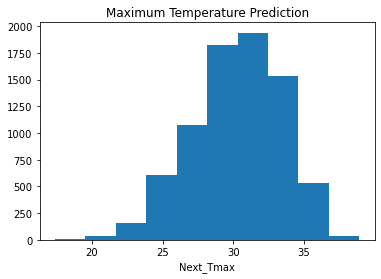

In [17]:
plt.hist(df['Next_Tmax'])
plt.xlabel('Next_Tmax')
plt.title('Maximum Temperature Prediction')

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

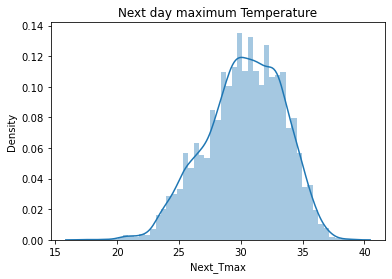

In [18]:
import seaborn as sns
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

We can observe that Next_Tmax peak distribution is between 25 to 35

Text(0.5, 1.0, 'Minimum Temperature Prediction')

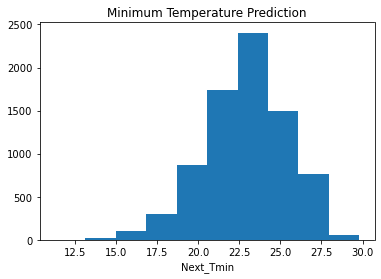

In [19]:
plt.hist(df['Next_Tmin'])
plt.xlabel('Next_Tmin')
plt.title('Minimum Temperature Prediction')

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

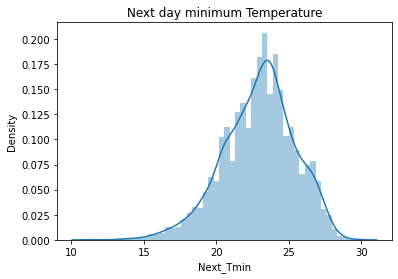

In [20]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

We can observe that Next_Tmin peak distribution is between 20 to 27

Text(0, 0.5, 'Next_Tmax')

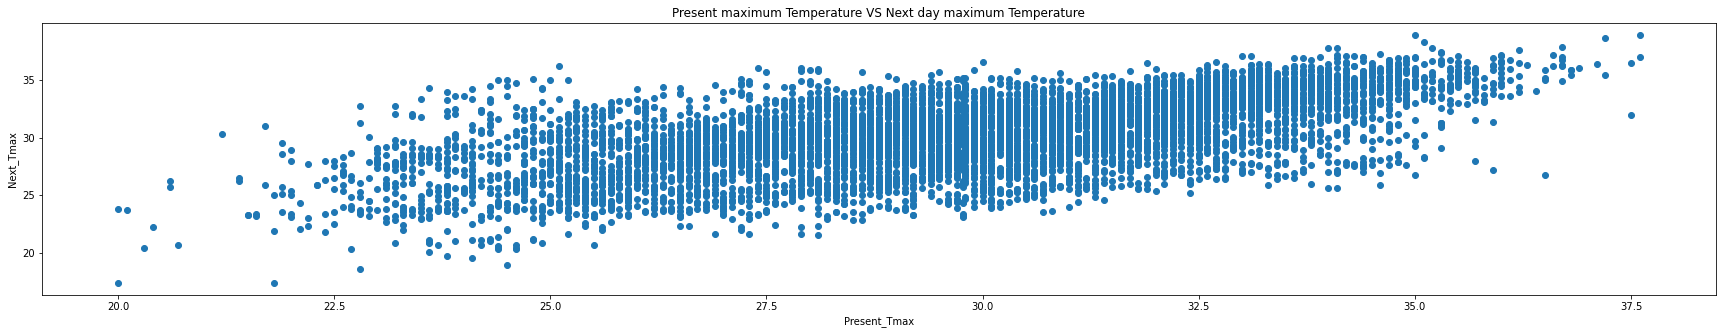

In [21]:
plt.figure(figsize=(30,5))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
plt.scatter(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

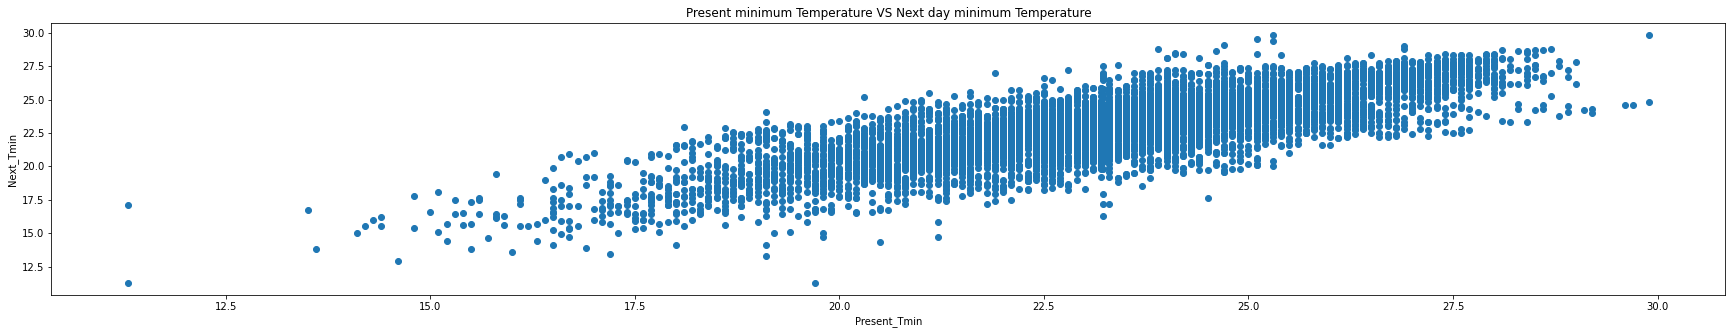

In [22]:
plt.figure(figsize=(30,5))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
plt.scatter(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

We can observe the relationship between present maximum temperature w.r.t Next day minimum Temperature and Present minimum Temperature w.r.t Next day minimum Temperature in the above 2 plots

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax'>

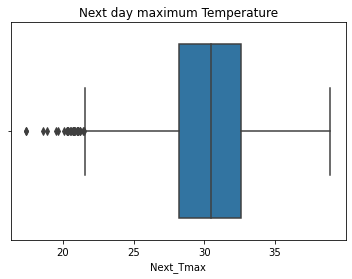

In [23]:
plt.title('Next day maximum Temperature')
sns.boxplot(df['Next_Tmax'])

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin'>

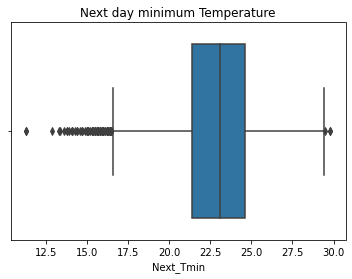

In [24]:
plt.title('Next day minimum Temperature')
sns.boxplot(df['Next_Tmin'])

There are outliers presence in Next_Tmax and Next_Tmin column

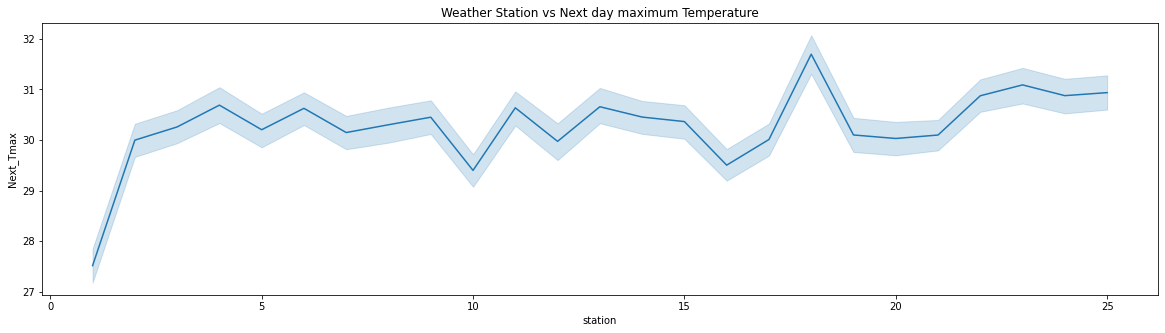

In [25]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

From above plot, we can observe that Next_Tmax is high at station 18

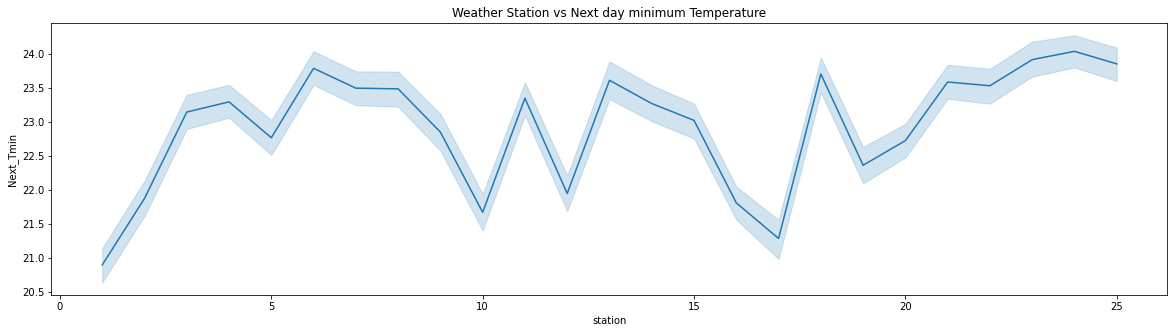

In [26]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

From above plot, we can observe that Next_Tmin is high at around station 18

Text(0, 0.5, 'Next_Tmax')

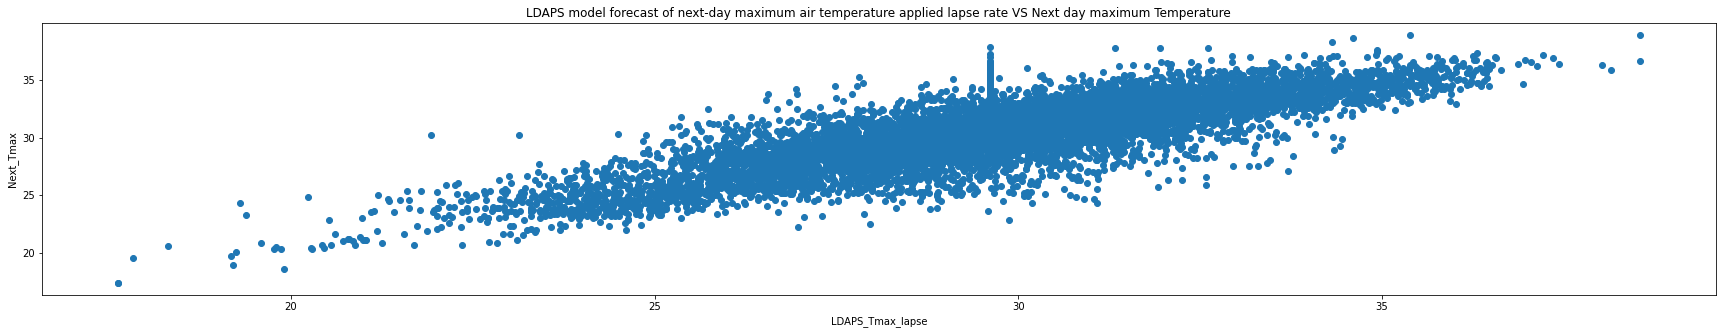

In [27]:
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day maximum air temperature applied lapse rate VS Next day maximum Temperature')
plt.scatter(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')

Above graph shows the distribution of data across LDAPS model forecast of next-day maximum air temperature applied lapse rate with respect to Next day maximum Temperature.

Text(0, 0.5, 'Next_Tmin')

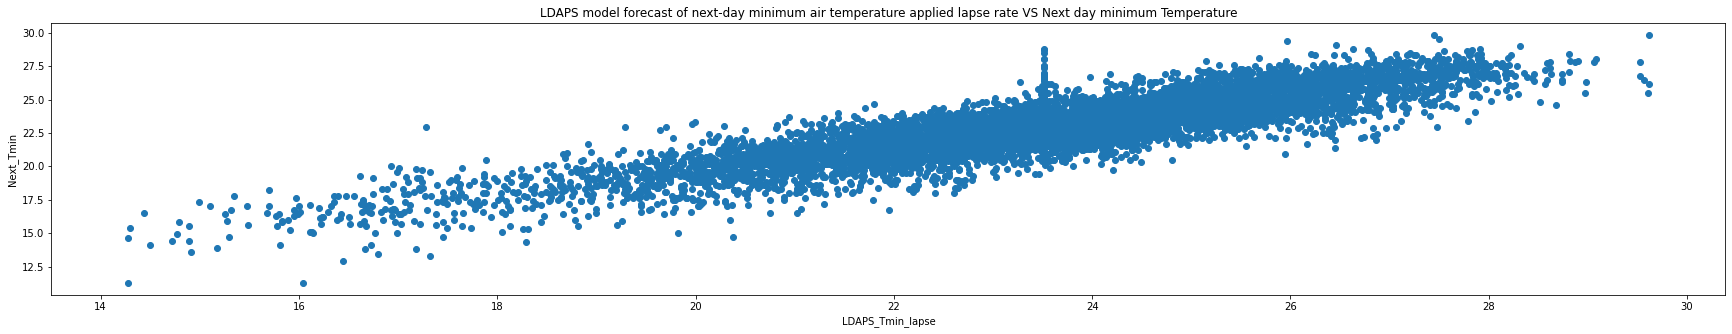

In [28]:
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day minimum air temperature applied lapse rate VS Next day minimum Temperature')
plt.scatter(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

Above graph shows the distribution of data across LDAPS model forecast of next-day minimum air temperature applied lapse rate with respect to Next day minimum Temperature.

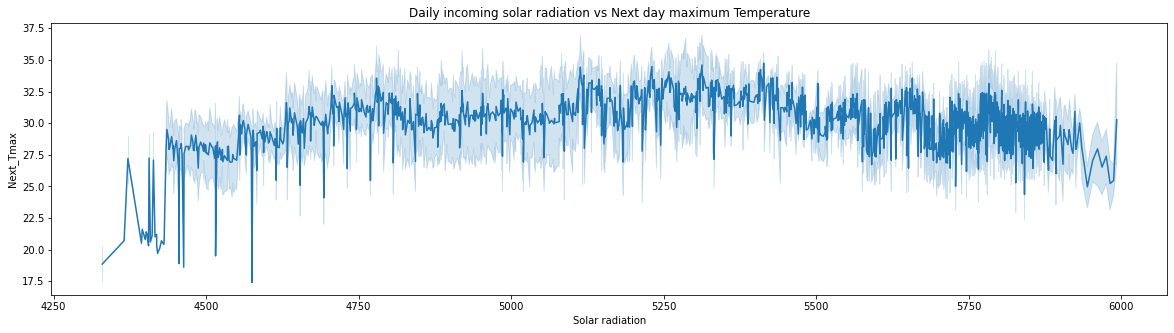

In [29]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

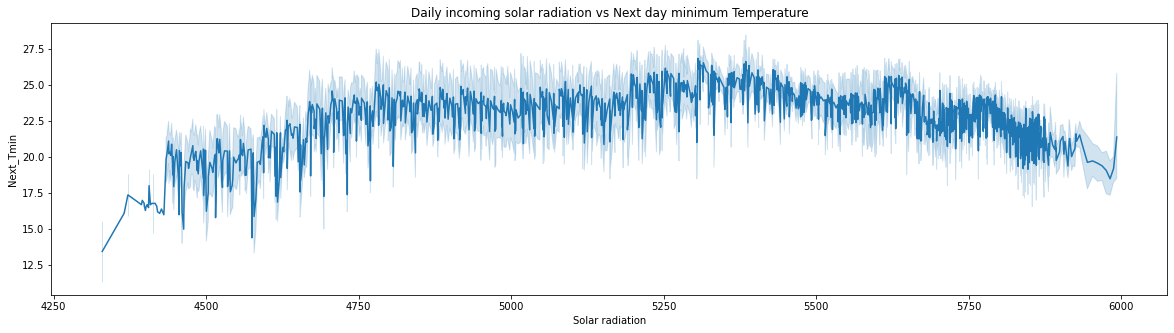

In [30]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

From above 2 plots, we can observe that Next_Tmin and Next_Tmax increases with daily incoming solar radiation

### Obtaining the Basic Statistical Information

In [31]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,735608.827012,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,11829.341785,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,735807.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736199.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


We can observe that difference between 75% and max is huge in some coolumns like LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 so skewness will be present in such columns

### Checking Correlation between each columns data

<AxesSubplot:>

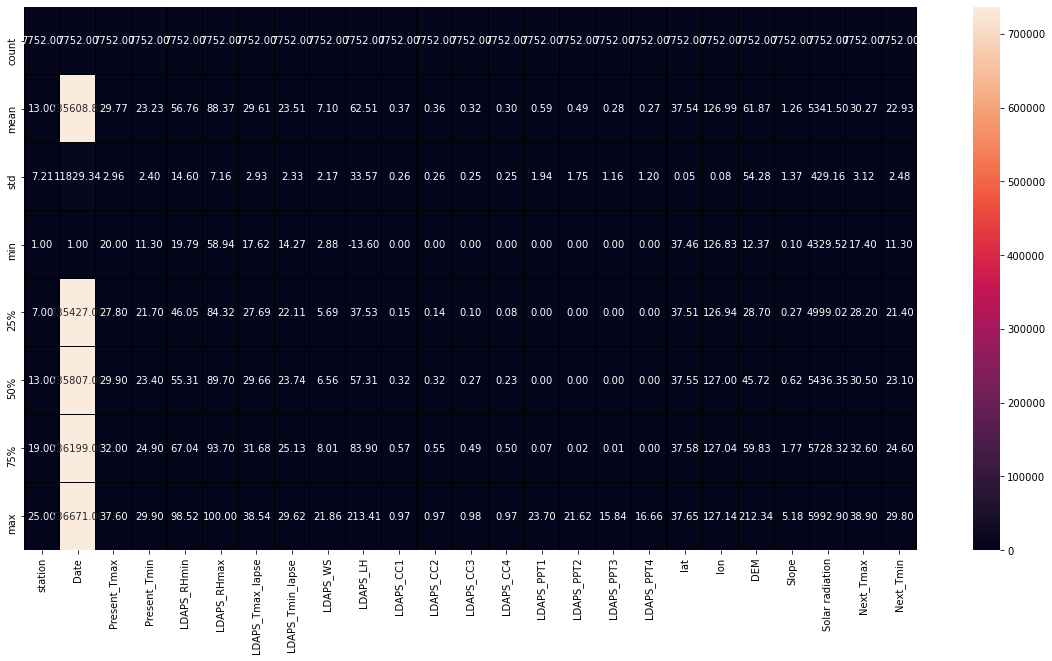

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [33]:
dfcor=df.corr()
dfcor

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Date,0.000000,1.000000,0.007766,0.019074,-0.003083,0.013541,0.008840,0.010287,-0.044282,-0.015528,...,-0.096594,-0.103827,-0.106507,-0.001874,0.002202,-0.014928,-0.016177,0.004326,0.013306,0.016178
Present_Tmax,0.112655,0.007766,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.019074,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.003083,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,0.013541,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.008840,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.010287,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.044282,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,-0.015528,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440


<AxesSubplot:>

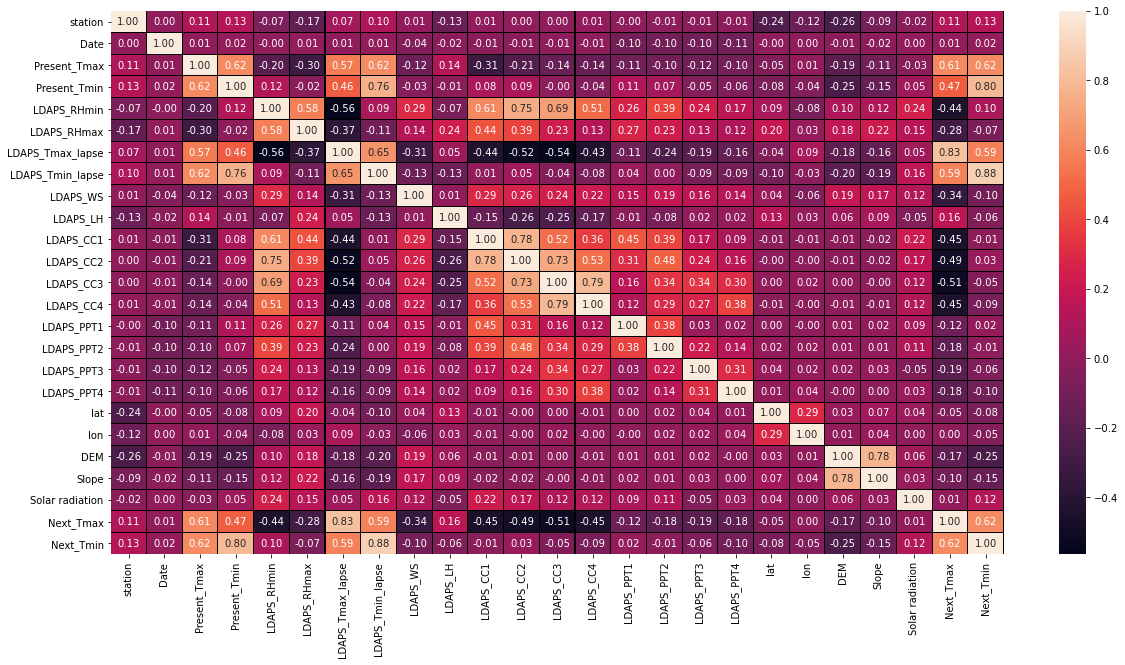

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Using Heatmap, Correlation Matrix we can conclude below observations


LDAPS_Tmax_lapse and Present_Tmax are positively correlated with Next_Tmax and lon is least correlated

LDAPS_Tmin_lapse and Present_Tmin are positively correlated with Next_Tmin and LDAPS_CC1, LDAPS_CC2 are least correlated

### Outliers Removal

#### Using ZScore Method

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66431530e+00, 4.73283412e-02, 3.61325771e-01, ...,
        1.51793488e+00, 3.76282142e-01, 6.97599301e-01],
       [1.52562236e+00, 4.73283412e-02, 7.21084007e-01, ...,
        1.22994952e+00, 7.20972505e-02, 1.74063574e-01],
       [1.38692941e+00, 4.73283412e-02, 6.19608090e-01, ...,
        1.21653443e+00, 2.64259847e-01, 3.89744132e-01],
       ...,
       [1.66431530e+00, 8.13430765e-02, 2.22171758e+00, ...,
        2.07432510e+00, 7.92634435e-01, 2.22793450e+00],
       [0.00000000e+00, 6.21890289e+01, 3.30412736e+00, ...,
        2.35821196e+00, 4.12345278e+00, 4.68452522e+00],
       [0.00000000e+00, 6.21890289e+01, 2.64912642e+00, ...,
        1.51793488e+00, 2.76237361e+00, 2.76579089e+00]])

In [36]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [37]:
df.shape

(7752, 25)

##### Dataset Shape before Outliers removal

In [38]:
df_new.shape

(6894, 25)

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [39]:
Data_loss=((7752-6894)/7752*100)
Data_loss

11.06811145510836

Upon analyzing, found 11% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set. we shall proceed with zscore method

### Skewness Analysis and Skewness Correction

In [40]:
df_new.skew()   

station             0.002792
Date                0.009490
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

We can observe that around 15 columns data has skewness out of allowed range of -0.5 to +0.5. We shall use Power transform method to resolve the skenwness

In [41]:
x = df_new.drop('Next_Tmax',axis=1)
y = df_new['Next_Tmax']

### Correcting Skewness using Power transform

In [42]:
from sklearn.preprocessing import power_transform
df_max=power_transform(x)
df_max=pd.DataFrame(df_max,columns=x.columns)

In [43]:
df_max.skew()

station            -0.201793
Date                0.007630
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098610
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmin          -0.021823
dtype: float64

In [44]:
x=df_max
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.871049,-1.445578,-0.480198,-0.847876,0.255239,0.347753,-0.673802,-0.357939,0.170447,0.348275,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,-0.020409,1.854276,1.329510,1.889266,-0.823152
1,-1.658471,-1.445578,0.668526,-0.765965,-0.177754,0.259931,-0.030722,0.111292,-0.584135,-0.171949,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,0.502989,0.069427,-0.374447,1.434120,-0.290265
2,-1.464383,-1.445578,0.555342,-0.045094,-0.448722,-0.726467,0.057585,0.364952,-0.260420,-1.388942,...,-0.538255,-0.498268,-0.475132,-0.428118,0.677101,0.841275,-0.353718,-0.943391,1.413770,0.312510
3,-1.282978,-1.445578,0.706507,-0.001324,0.254123,1.383197,-0.084189,-0.215346,-0.616421,0.243476,...,-0.538255,-0.498268,-0.475132,-0.428118,2.009404,0.374205,0.098490,1.250934,1.390562,0.490201
4,-1.111079,-1.445578,0.480519,-0.641952,0.107664,0.184230,-0.299338,-0.142691,-0.551233,1.303975,...,-0.538255,-0.498268,-0.475132,-0.428118,0.140865,1.872937,-0.279099,-0.390970,1.399661,-0.290265


In [45]:
p= df_new.drop('Next_Tmin',axis=1)
q= df_new['Next_Tmin']

Dropping the Next_Tmin in 'p' variable and other variables in "q" 

In [46]:
from sklearn.preprocessing import power_transform
df_min=power_transform(p)
df_min=pd.DataFrame(df_min,columns=p.columns)

In [47]:
df_min.skew()

station            -0.201793
Date                0.007630
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098610
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmax          -0.035691
dtype: float64

In [48]:
p=df_max
p.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.871049,-1.445578,-0.480198,-0.847876,0.255239,0.347753,-0.673802,-0.357939,0.170447,0.348275,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,-0.020409,1.854276,1.329510,1.889266,-0.823152
1,-1.658471,-1.445578,0.668526,-0.765965,-0.177754,0.259931,-0.030722,0.111292,-0.584135,-0.171949,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,0.502989,0.069427,-0.374447,1.434120,-0.290265
2,-1.464383,-1.445578,0.555342,-0.045094,-0.448722,-0.726467,0.057585,0.364952,-0.260420,-1.388942,...,-0.538255,-0.498268,-0.475132,-0.428118,0.677101,0.841275,-0.353718,-0.943391,1.413770,0.312510
3,-1.282978,-1.445578,0.706507,-0.001324,0.254123,1.383197,-0.084189,-0.215346,-0.616421,0.243476,...,-0.538255,-0.498268,-0.475132,-0.428118,2.009404,0.374205,0.098490,1.250934,1.390562,0.490201
4,-1.111079,-1.445578,0.480519,-0.641952,0.107664,0.184230,-0.299338,-0.142691,-0.551233,1.303975,...,-0.538255,-0.498268,-0.475132,-0.428118,0.140865,1.872937,-0.279099,-0.390970,1.399661,-0.290265


## Model Building: Regression Problem

### Linear Regression Model

In [49]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
lr_max=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [50]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr_max.fit(x_train,y_train)
    pred_train_max=lr_max.predict(x_train)
    pred_test_max=lr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.7887874979678338
At random state 0,the testing accuracy is:0.7665653892493642


At random state 1,the training accuracy is:0.7818238850233146
At random state 1,the testing accuracy is:0.7696810525549747


At random state 2,the training accuracy is:0.77832511601422
At random state 2,the testing accuracy is:0.7707583637792224


At random state 3,the training accuracy is:0.7874038892430947
At random state 3,the testing accuracy is:0.7664158409705971


At random state 4,the training accuracy is:0.7647137972481126
At random state 4,the testing accuracy is:0.7771330304069759


At random state 5,the training accuracy is:0.771349096103526
At random state 5,the testing accuracy is:0.7744091522957872


At random state 6,the training accuracy is:0.779622794514357
At random state 6,the testing accuracy is:0.7696266790922799


At random state 7,the training accuracy is:0.7805893143513671
At random state 7,the testing accuracy is:0.7703371515402258


At r

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
lr_max.fit(x_train,y_train)

LinearRegression()

In [52]:
print(lr_max.intercept_)

30.57182217315389


In [53]:
coeff_df=pd.DataFrame(lr_max.coef_,x.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
station,0.124695
Date,0.103496
Present_Tmax,0.300304
Present_Tmin,-0.024958
LDAPS_RHmin,0.122058
LDAPS_RHmax,-0.145972
LDAPS_Tmax_lapse,1.516635
LDAPS_Tmin_lapse,-0.545547
LDAPS_WS,-0.304334
LDAPS_LH,0.256561


In [54]:
pred=lr_max.predict(x_test)

In [55]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
3358,35.3,34.041260
4818,29.5,26.604244
2600,27.5,28.500539
2981,28.3,29.823295
3123,27.9,28.436090


In [56]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.0820518599196849
Mean squared error: 1.9822745138521751
Root mean squared error: 1.4079327092770362


In [57]:
predict_test=lr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

76.65653892493643


In [58]:
predict_train=lr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

78.87874979678338


Cross validation score for Linear Regression Model of Next_Tmax is 78.87%

In [59]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.5990571198617466 and accuracy score for training is 0.7887874979678338 and accuracy score for testing is 0.7665653892493642


At cross fold(j) the cv score is 0.6743908519843074 and accuracy score for training is 0.7887874979678338 and accuracy score for testing is 0.7665653892493642


At cross fold(j) the cv score is 0.6991979144644491 and accuracy score for training is 0.7887874979678338 and accuracy score for testing is 0.7665653892493642


At cross fold(j) the cv score is 0.6863717368459693 and accuracy score for training is 0.7887874979678338 and accuracy score for testing is 0.7665653892493642


At cross fold(j) the cv score is 0.6886316914707139 and accuracy score for training is 0.7887874979678338 and accuracy score for testing is 0.7665653892493642


At cross fold(j) the cv score is 0.6945646634160756 and accuracy score for training is 0.7887874979678338 and accuracy score for testing is 0.7665653892493642


At cross fold(j) the cv score is 0

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 78.87% & 76.65% respectively.

### Plotting y_test against prediction

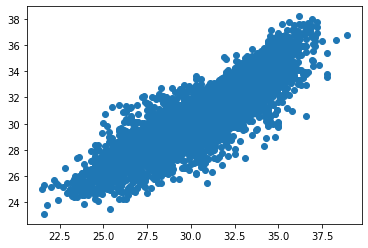

In [60]:
plt.scatter(x=y_test,y=predict_test)

Linear Regression Model for Next_Tmin

In [61]:
from sklearn.linear_model import LinearRegression
lr_min=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [62]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    lr_min.fit(p_train,q_train)
    pred_train_min=lr_min.predict(p_train)
    pred_test_min=lr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.997266654505437
At random state 0,the testing accuracy is:0.9972238704119137


At random state 1,the training accuracy is:0.9972813902092393
At random state 1,the testing accuracy is:0.9972110532854722


At random state 2,the training accuracy is:0.9973758486659805
At random state 2,the testing accuracy is:0.997184278493678


At random state 3,the training accuracy is:0.9974315249943922
At random state 3,the testing accuracy is:0.9971315234223944


At random state 4,the training accuracy is:0.9974322823218266
At random state 4,the testing accuracy is:0.9971354913518319


At random state 5,the training accuracy is:0.9973657932633408
At random state 5,the testing accuracy is:0.9971940785661961


At random state 6,the training accuracy is:0.9973698752837848
At random state 6,the testing accuracy is:0.997161320109064


At random state 7,the training accuracy is:0.9971126051124412
At random state 7,the testing accuracy is:0.9973018958753884


At 

In [63]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=6)
lr_min.fit(p_train,q_train)

LinearRegression()

In [64]:
print(lr_min.intercept_)

23.08319004909212


In [65]:
coeff_df=pd.DataFrame(lr_min.coef_,p.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
station,-0.005124
Date,-0.016761
Present_Tmax,-0.009847
Present_Tmin,0.006181
LDAPS_RHmin,0.021116
LDAPS_RHmax,0.007416
LDAPS_Tmax_lapse,0.023304
LDAPS_Tmin_lapse,-0.004007
LDAPS_WS,-0.009178
LDAPS_LH,-0.004670


In [66]:
pred=lr_min.predict(p_test)

In [67]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
2963,21.4,21.295268
6046,24.3,24.162877
6723,27.3,27.524324
2438,24.6,24.558574
3690,21.6,21.608569


In [68]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.0903217618563781
Mean squared error: 0.015625164740023234
Root mean squared error: 0.12500065895835602


In [69]:
predict_test=lr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.7161320109064


In [70]:
predict_train=lr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.73698752837848


Cross Validation score for Linear Regression model of Next_Tmin 99.73%.

In [71]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9965970786636591 and accuracy score for training is 0.9973698752837848 and accuracy score  for testing is 0.997161320109064


At cross fold(j) the cv score is 0.995750264971179 and accuracy score for training is 0.9973698752837848 and accuracy score  for testing is 0.997161320109064


At cross fold(j) the cv score is 0.9964375522462476 and accuracy score for training is 0.9973698752837848 and accuracy score  for testing is 0.997161320109064


At cross fold(j) the cv score is 0.9961866973432247 and accuracy score for training is 0.9973698752837848 and accuracy score  for testing is 0.997161320109064


At cross fold(j) the cv score is 0.9956579836243088 and accuracy score for training is 0.9973698752837848 and accuracy score  for testing is 0.997161320109064


At cross fold(j) the cv score is 0.996199286527984 and accuracy score for training is 0.9973698752837848 and accuracy score  for testing is 0.997161320109064


At cross fold(j) the cv score is 0.9

We can observe Cross validation score of 99.47 for train_accuracy and test_accuracy are 99.73 % and 99.71%

### Plotting q_test against prediction

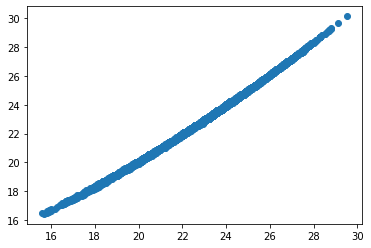

In [72]:
plt.scatter(x=q_test,y=predict_test)

## Decision Tree Regressor Model

#### Decision Tree Regressor Model for Next_Tmax

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr_max=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [74]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr_max.fit(x_train,y_train)
    pred_train_max=dtr_max.predict(x_train)
    pred_test_max=dtr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.6910038992684062


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.6936118043150945


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.6883653734843862


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.6692760939585283


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.718210162604491


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.689396329015945


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.6925487045283989


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.6897146867623689


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.6776383540937454


At random st

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
dtr_max.fit(x_train,y_train)

DecisionTreeRegressor()

In [76]:
pred=dtr_max.predict(x_test)

In [77]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
247,26.6,25.6
7435,28.4,28.6
1959,28.0,27.4
6975,30.0,30.8
6995,33.0,34.0


In [78]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.175693968887512
Mean squared error: 2.5501891241541785
Root mean squared error: 1.5969311582388823


we can observe that for Linear Regressor model, RMSE value is high so we need to check other models value and decide.

In [79]:
predict_test=lr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

77.15713278405755


In [80]:
predict_train=lr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

77.79055925569729


Cross validation score for Decision Tree Model of Next_Tmax 77.79%

In [81]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.5990571198617466 and accuracy score for training is 0.7779055925569729 and accuracy score for testing is 0.7715713278405756


At cross fold(j) the cv score is 0.6743908519843074 and accuracy score for training is 0.7779055925569729 and accuracy score for testing is 0.7715713278405756


At cross fold(j) the cv score is 0.6991979144644491 and accuracy score for training is 0.7779055925569729 and accuracy score for testing is 0.7715713278405756


At cross fold(j) the cv score is 0.6863717368459693 and accuracy score for training is 0.7779055925569729 and accuracy score for testing is 0.7715713278405756


At cross fold(j) the cv score is 0.6886316914707139 and accuracy score for training is 0.7779055925569729 and accuracy score for testing is 0.7715713278405756


At cross fold(j) the cv score is 0.6945646634160756 and accuracy score for training is 0.7779055925569729 and accuracy score for testing is 0.7715713278405756


At cross fold(j) the cv score is 0

We can observe Cross validation score for Next_Tmax as 65.01 for train_accuracy 77.79 % and test_accuracy 77.15 %

### Plotting y_test against Prediction

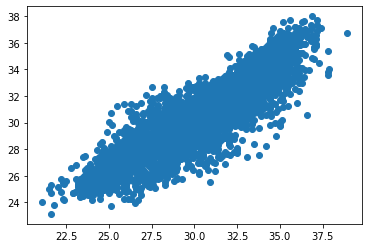

In [82]:
plt.scatter(x=y_test,y=predict_test)

### Decision Tree Regressor model for Next_Tmin

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr_min=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [84]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    dtr_min.fit(p_train,q_train)
    pred_train_min=dtr_min.predict(p_train)
    pred_test_min=dtr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.9996206056125393


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.9998260341749529


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.9997009698734894


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.9998929168114066


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.9997532255385762


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.9997382299164704


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.9996435041506458


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.9998765817358275


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.9998875171312328


At random 

In [85]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=2)
dtr_min.fit(p_train,q_train)

DecisionTreeRegressor()

In [86]:
pred=dtr_min.predict(p_test)

In [87]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
1030,24.2,24.2
2043,23.2,23.2
149,21.8,21.8
6243,21.5,21.5
3602,23.1,23.1


In [88]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.0028387898881107204
Mean squared error: 0.0010049730625777049
Root mean squared error: 0.03170131010822273


In [89]:
predict_test=dtr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.9818258632384


In [90]:
predict_train=dtr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

100.0


Cross validation score for Next_Tmin is 100%.

In [91]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9999025317931929 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839


At cross fold(j) the cv score is 0.9999020999162643 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839


At cross fold(j) the cv score is 0.9999104261554241 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839


At cross fold(j) the cv score is 0.9999405846315226 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839


At cross fold(j) the cv score is 0.9999197188169925 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839


At cross fold(j) the cv score is 0.9999249048498486 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839


At cross fold(j) the cv score is 0.9999000607952035 and accuracy score for training is 1.0 and accuracy score for testing 0.9998182586323839



Cross validation score of Next_Tmin is 99.98 for train_accuaracy 100 % and test_accuracy 99.98 %

### Plotting q_test against prediction

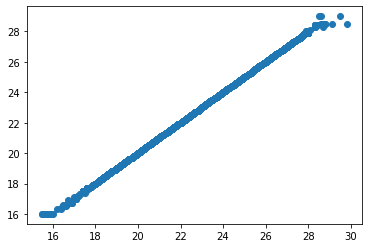

In [92]:
plt.scatter(x=q_test,y=predict_test)

### Random Forest Regressor Model

#### Random Forest Regressor model for T_max

In [93]:
from sklearn.ensemble import RandomForestRegressor
rdr_max=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [94]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr_max.fit(x_train,y_train)
    pred_train_max=rdr_max.predict(x_train)
    pred_test_max=rdr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.9813705548698343
At random state 0,the testing accuracy is:0.848836796110981


At random state 1,the training accuracy is:0.9797146683092378
At random state 1,the testing accuracy is:0.8535229294116148


At random state 2,the training accuracy is:0.97983425483851
At random state 2,the testing accuracy is:0.8579096904330823


At random state 3,the training accuracy is:0.9809800786174188
At random state 3,the testing accuracy is:0.8491882355230151


At random state 4,the training accuracy is:0.9795430543915418
At random state 4,the testing accuracy is:0.8586096814376482


At random state 5,the training accuracy is:0.9799080450598888
At random state 5,the testing accuracy is:0.8596224695538273


At random state 6,the training accuracy is:0.9800962319220494
At random state 6,the testing accuracy is:0.8591108451438114


At random state 7,the training accuracy is:0.980660883928217
At random state 7,the testing accuracy is:0.8569125224424453


At r

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=9)
rdr_max.fit(x_train,y_train)

RandomForestRegressor()

In [96]:
pred=rdr_max.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
5305,30.0,30.036
2153,34.2,30.325
2262,30.1,29.937
4690,27.3,28.147
2248,31.3,31.696


In [97]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.8254903752194491
Mean squared error: 1.213228846303437
Root mean squared error: 1.10146667961561


In [98]:
predict_test=rdr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

85.8767436012459


In [99]:
predict_train=rdr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

98.06136958157896


Cross validation Score for Next_Tmax is 98.06 %.

In [100]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6121030623543866 and accuracy score for training is 0.9806136958157896 and accuracy score for testing is 0.8587674360124591


At cross fold(j) the cv score is 0.6895573802050272 and accuracy score for training is 0.9806136958157896 and accuracy score for testing is 0.8587674360124591


At cross fold(j) the cv score is 0.662113632896189 and accuracy score for training is 0.9806136958157896 and accuracy score for testing is 0.8587674360124591


At cross fold(j) the cv score is 0.6709509544365081 and accuracy score for training is 0.9806136958157896 and accuracy score for testing is 0.8587674360124591


At cross fold(j) the cv score is 0.660387498079673 and accuracy score for training is 0.9806136958157896 and accuracy score for testing is 0.8587674360124591


At cross fold(j) the cv score is 0.6693785845269009 and accuracy score for training is 0.9806136958157896 and accuracy score for testing is 0.8587674360124591


At cross fold(j) the cv score is 0.6

Cross validation score of Next_Tmax is 63.92 for train_accuaracy 98.06 % and test_accuracy 85.87 %

### Plotting y_test against Prediction

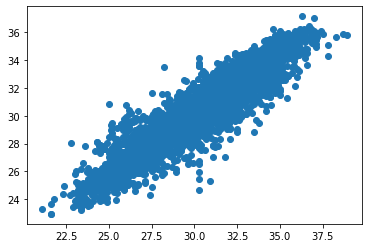

In [101]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

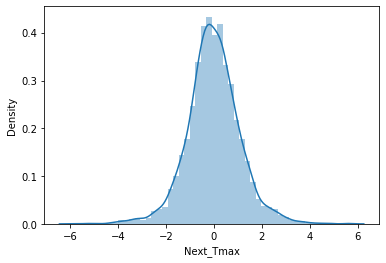

In [102]:
sns.distplot((y_test-predict_test),bins=50)

#### Random Forest Regressor model for Next_tmin

In [103]:
from sklearn.ensemble import RandomForestRegressor
rdr_min=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [104]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    rdr_min.fit(p_train,q_train)
    pred_train_min=rdr_min.predict(p_train)
    pred_test_min=rdr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9999699168976773
At random state 0,the testing accuracy is:0.9999182891988555


At random state 1,the training accuracy is:0.9999755896024065
At random state 1,the testing accuracy is:0.9999389206994503


At random state 2,the training accuracy is:0.9999889632798311
At random state 2,the testing accuracy is:0.9996662923840711


At random state 3,the training accuracy is:0.999977256480016
At random state 3,the testing accuracy is:0.9998659693642891


At random state 4,the training accuracy is:0.9999665318293459
At random state 4,the testing accuracy is:0.9997168381352464


At random state 5,the training accuracy is:0.9999816807857594
At random state 5,the testing accuracy is:0.9998083039535832


At random state 6,the training accuracy is:0.9999702409915001
At random state 6,the testing accuracy is:0.9999449396978409


At random state 7,the training accuracy is:0.999982166201596
At random state 7,the testing accuracy is:0.9999413311843823


At

In [105]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=3)
rdr_min.fit(p_train,q_train)

RandomForestRegressor()

In [106]:
pred=rdr_min.predict(p_test)
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
2258,22.4,22.40
7121,27.2,27.21
2909,19.0,19.00
3832,25.7,25.70
3869,25.8,25.80


In [107]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.0029891049426361014
Mean squared error: 0.0007605349782405915
Root mean squared error: 0.027577798647473506


In [108]:
predict_test=rdr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.98640028014859


In [109]:
predict_train=rdr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.99695391687085


Cross validation score for Tmin is 99.99%

In [110]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is{Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9999068008337781 and accuracy score for training is 0.9999695391687085 and accuracy score for testing is0.9998640028014858


At cross fold(j) the cv score is 0.9998864166489912 and accuracy score for training is 0.9999695391687085 and accuracy score for testing is0.9998640028014858


At cross fold(j) the cv score is 0.9999287887902639 and accuracy score for training is 0.9999695391687085 and accuracy score for testing is0.9998640028014858


At cross fold(j) the cv score is 0.9999281865526036 and accuracy score for training is 0.9999695391687085 and accuracy score for testing is0.9998640028014858


At cross fold(j) the cv score is 0.9999101770382498 and accuracy score for training is 0.9999695391687085 and accuracy score for testing is0.9998640028014858


At cross fold(j) the cv score is 0.999931212360106 and accuracy score for training is 0.9999695391687085 and accuracy score for testing is0.9998640028014858


At cross fold(j) the cv score is 0.999928

Cross validation score of Next_Tmin is 99.99 for train_accuaracy 99.99 % and test_accuracy 99.98 %

### Plotting q_test against prediction

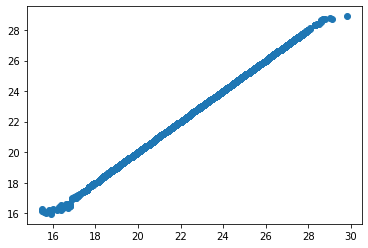

In [111]:
plt.scatter(x=q_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

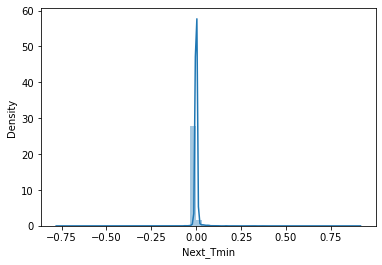

In [112]:
sns.distplot((q_test-predict_test))

## Hyper Parameter Tuning using GridSearch CV

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [114]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 76.94751132345954
Cross Val Score: 68.6804319095643


Hyper Parameter Tuning for Linear Regression of Next_Tmin R2 score is 76.94% and CV score is 68.69%.

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [116]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(p_train,q_train)
ls.score(p_train,q_train)
pred_decision=ls.predict(p_test)
lss=r2_score(q_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 99.71280897068314
Cross Val Score: 68.6804319095643


Hyper Parameter Tuning for Decision Tree Regressor of Next_Tmax R2 Score is 99.71% and CV score is 68.68%

In [117]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [144]:
GCV.best_params_

{'max_depth': 8, 'random_state': 5}

In [145]:
dtr=DecisionTreeRegressor(max_depth=8,random_state=2)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 75.19719332574412
Cross Val Score: 52.510886562733084


Hyper Parameter Tuning for Decision Tree Regressor of Next_Tmin R2 Score is 75.19% and CV score is 52.51%.

In [146]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(p_train,q_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [147]:
GCV.best_params_

{'max_depth': 9, 'random_state': 6}

In [148]:
dtr=DecisionTreeRegressor(max_depth=9,random_state=2)

dtr.fit(p_train,q_train)
dtr.score(p_train,q_train)
pred_decision=dtr.predict(p_test)
dtrs=r2_score(q_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 99.98714260676749
Cross Val Score: 51.304654398379476


Hyper Parameter Tuning for Random Forest Regressor of Next_Tmax R2 score is 99.98% and CV Score is 51.30%.

In [149]:

from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':list(range(0,6))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 4}


In [150]:
rdr=RandomForestRegressor(criterion='mse',max_features='sqrt',random_state=4)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 86.50793867965838
Cross Val Score: 67.40350736326893


Hyper Parameter Tuning for Random Forest Regressor of Next_Tmin R2 score is 86.50% and CV score is 67.40%

In [118]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':list(range(0,5))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'random_state': 2}


In [119]:
rdr=RandomForestRegressor(criterion='mse',max_features='auto',random_state=5)
rdr.fit(p_train,q_train)
rdr.score(p_train,q_train)
pred_decision=rdr.predict(p_test)
rdrs=r2_score(q_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 99.9863151497827
Cross Val Score: 66.89866896948098


Upon reviewing all the above details, found Random Forest Regressor model has best model so saving the Randoam Forest model as best model

### Comparing Actual Value and Predicted Value for Next_Tmax

,Y Test,Prediction
5305,30.0,22.40
2153,34.2,27.21
2262,30.1,19.00
4690,27.3,25.70
2248,31.3,25.80


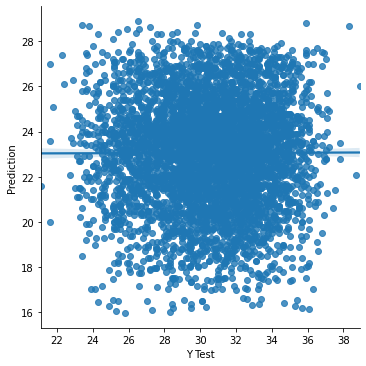

In [120]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

### Comparing Actual Value and Predicted Value for Next_Tmin

,Q Test,Prediction
2258,22.4,22.40
7121,27.2,27.21
2909,19.0,19.00
3832,25.7,25.70
3869,25.8,25.80


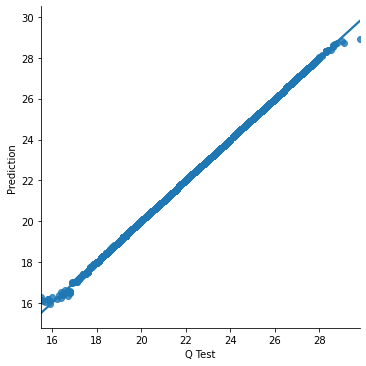

In [121]:
data=pd.DataFrame({'Q Test':q_test , 'Prediction':predict_test},columns=['Q Test','Prediction'])
sns.lmplot(x='Q Test',y='Prediction',data=data,palette='rainbow')
data.head()

### Next_Tmax: 

### Model Saving

In [125]:
import pickle
filename='Temperature_Forecast_Project_using_ML_Project_Next_Tmax.pkl'
pickle.dump(rdr_max, open(filename, 'wb'))

### Model Loading

In [126]:
loaded_model = pickle.load(open('Temperature_Forecast_Project_using_ML_Project_Next_Tmax.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

85.8767436012459


In [127]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825
Predicted,30.036,30.325,29.937,28.147,31.696,29.731749,29.149,31.129,29.881,32.163,...,31.089,27.723749,31.824,27.23,25.429,32.492,34.836,31.899247,32.25,27.709
Original,22.400,27.207,18.999,25.700,25.800,16.167000,20.500,18.507,23.100,23.400,...,20.500,24.000000,24.900,24.30,20.800,26.500,23.100,22.100000,23.80,26.200


### Next_Tmin:

### Model Saving

In [128]:
import pickle
filename='Temperature_Forecast_Project_using_ML_Project_Next_Tmin.pkl'
pickle.dump(rdr_min, open(filename, 'wb'))

### Model Loading

In [129]:
loaded_model = pickle.load(open('Temperature_Forecast_Project_using_ML_Project_Next_Tmin.pkl', 'rb'))
result = loaded_model.score(p_test,q_test)
print(result*100)

99.98640028014859


In [130]:
conclusion=pd.DataFrame([loaded_model.predict(p_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825
Predicted,22.4,27.210,19.000,25.7,25.8,16.199,20.5,18.502,23.1,23.4,...,20.5,24.0,24.9,24.3,20.8,26.5,23.1,22.1,23.8,26.2
Original,22.4,27.207,18.999,25.7,25.8,16.167,20.5,18.507,23.1,23.4,...,20.5,24.0,24.9,24.3,20.8,26.5,23.1,22.1,23.8,26.2
